## Chapter 11.3

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

def plotGraph(history,title):
    loss,acc = history.history.values()
    epochs = range(1,len(loss)+1)
    # Plot graph
    plt.plot(epochs,acc,label = 'Training Accuracy')
    plt.title('Training Accuracy of %s Model'%title)
    plt.legend()
    plt.figure()

    plt.plot(epochs,loss,label='Training Loss')
    plt.title('Training Loss of %s Model'%title)
    plt.legend()
    plt.figure()

def textGenerator(model, title):
    seed_text = "I've got a bad feeling about this"
    next_words = 100
    
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    print(title,'model:',seed_text)


data = open('irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# print(tokenizer.word_index)
# print(total_words)

input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [9]:
model_1 = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len-1),
    Bidirectional(LSTM(150)),
    Dense(total_words, activation='softmax'),
])
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [2]:
from tensorflow.keras import regularizers
# 还可以在全连接层中使用正则化。
model_2 = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len-1),
    Bidirectional(LSTM(150, return_sequences = True)),
    Dense(total_words, activation='softmax'),
    Dropout(0.2),
    LSTM(100),
    Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(total_words, activation='softmax')
])
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
history1 = model_1.fit(xs, ys, epochs=150, verbose=1)

Epoch 1/150
377/377 [==============================] - 16s 28ms/step - loss: 6.8485 - accuracy: 0.0601
Epoch 2/150
377/377 [==============================] - 11s 30ms/step - loss: 5.8288 - accuracy: 0.1069
Epoch 3/150
377/377 [==============================] - 14s 38ms/step - loss: 4.8479 - accuracy: 0.1687
Epoch 4/150
377/377 [==============================] - 17s 44ms/step - loss: 3.8698 - accuracy: 0.2513
Epoch 5/150
377/377 [==============================] - 18s 47ms/step - loss: 2.9664 - accuracy: 0.3695
Epoch 6/150
377/377 [==============================] - 23s 60ms/step - loss: 2.3708 - accuracy: 0.4683
Epoch 7/150
377/377 [==============================] - 21s 55ms/step - loss: 1.8821 - accuracy: 0.5671
Epoch 8/150
377/377 [==============================] - 18s 49ms/step - loss: 1.5493 - accuracy: 0.6348
Epoch 9/150
377/377 [==============================] - 15s 39ms/step - loss: 1.3402 - accuracy: 0.6756
Epoch 10/150
377/377 [==============================] - 13s 33ms/step - l

Regularized model: I've got a bad feeling about this consolation to see ye there was my soul did stray can from auld no more till me and eer i had he knows their barrow slowly raising kilgary early and late i cannot father died shall tyrant approaching that dropped shining pike little birds chirping the holly bush under the table eye whiskey in her eye ever beaming to die on when rest along with me i might say she began away from me and this i will ral side by side by tomorrow and thyme away now tis proud old woman did say one put gone by in prison


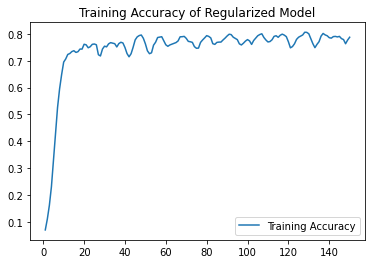

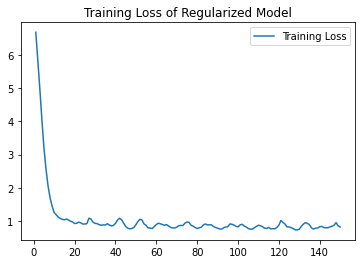

<Figure size 432x288 with 0 Axes>

In [11]:
plotGraph(history1,'Regularized')
textGenerator(model_1,'Regularized')

In [4]:
history2 = model_2.fit(xs, ys, epochs=150, verbose=1)

Epoch 1/150
377/377 [==============================] - 29s 56ms/step - loss: 7.3797 - accuracy: 0.0561
Epoch 2/150
377/377 [==============================] - 23s 62ms/step - loss: 6.3975 - accuracy: 0.0660
Epoch 3/150
377/377 [==============================] - 24s 64ms/step - loss: 6.3081 - accuracy: 0.0669
Epoch 4/150
377/377 [==============================] - 26s 68ms/step - loss: 6.2473 - accuracy: 0.0657
Epoch 5/150
377/377 [==============================] - 30s 79ms/step - loss: 6.0786 - accuracy: 0.0673
Epoch 6/150
377/377 [==============================] - 28s 73ms/step - loss: 6.0407 - accuracy: 0.0649
Epoch 7/150
377/377 [==============================] - 34s 91ms/step - loss: 5.9193 - accuracy: 0.0712
Epoch 8/150
377/377 [==============================] - 37s 97ms/step - loss: 5.8543 - accuracy: 0.0707
Epoch 9/150
377/377 [==============================] - 41s 109ms/step - loss: 5.7996 - accuracy: 0.0698
Epoch 10/150
377/377 [==============================] - 41s 109ms/step -

Regularized model: I've got a bad feeling about this jewel they mind fifty mary as sit so only and fair more charming my rose of whiskey and twined mary i wish when youre waitin in the floor for dublin morning land drown in the warm mountain new ra na weeping and sun fine weeping mountain ra li weeping and loud and prove be too morning and started again i underfoot set all brooks lays ill thee waves for to trade you eer i had when she sets to rock me born wid the writin you no day it no pretty sang roddy throbbing breast the mountain darlin setting with


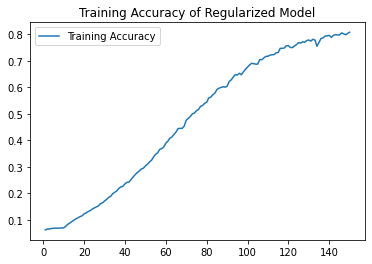

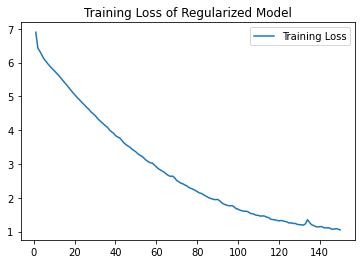

<Figure size 432x288 with 0 Axes>

In [7]:
plotGraph(history2,'Regularized')
textGenerator(model_2,'Regularized')